In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [46]:
n_game_avg = 30
simulation_names = ['baseline', 'smaller_alpha', 'larger_alpha', 
                    'smaller_gamma', 'larger_gamma',
                    'smaller_tau', 'larger_tau',
                    'smaller_buffer',
                    'non_stochastic', 'single_critic', 'smaller_dim']

data = {}
for name in simulation_names:
    data[name] = np.load(fr'results\data\{name}.npy' , allow_pickle=True).item()

In [47]:
def plot_running_avg(data, names, label_names, n_game_avg):
    for name, label_name in zip(names, label_names):
        data[name]['running_avg'] = \
            np.array((pd.DataFrame(data[name]['score_history']).rolling(n_game_avg, min_periods=1).mean())[0])
        plt.plot(data[name]['step_history'], data[name]['running_avg'], label=label_name)

    plt.legend()
    plt.xlabel('Step')
    plt.ylabel(f'Score running average of the last {n_game_avg} games')
    plt.show()

## Baseline 

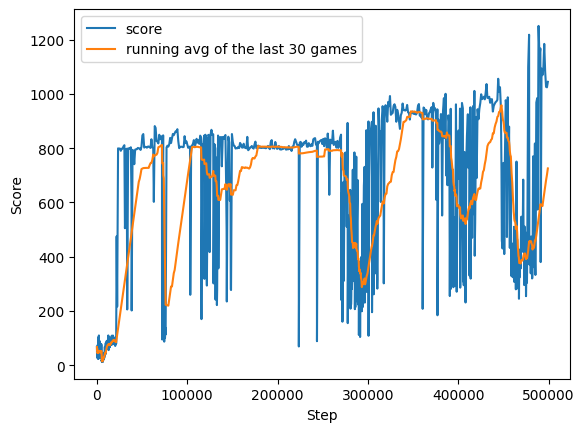

In [48]:
names = ['baseline']
label_names = ['Baseline']


for name, label_name in zip(names, label_names):
        data[name]['running_avg'] = \
            np.array((pd.DataFrame(data[name]['score_history']).rolling(n_game_avg, min_periods=1).mean())[0])
        plt.plot(data[name]['step_history'], data[name]['score_history'], label='score')
        plt.plot(data[name]['step_history'], data[name]['running_avg'], label='running avg of the last 30 games')

plt.legend()
plt.xlabel('Step')
plt.ylabel('Score')
plt.show()

## Alpha

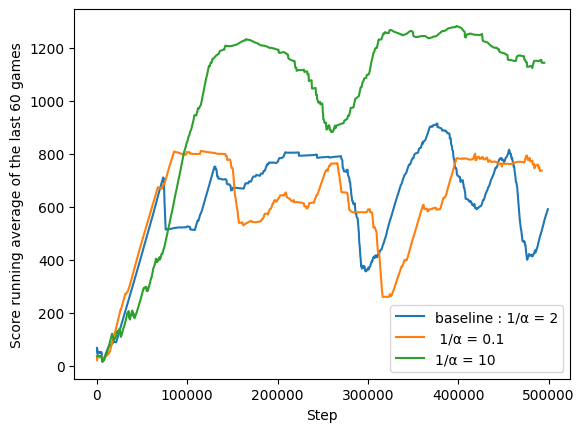

In [49]:
names = ['baseline', 'smaller_alpha', 'larger_alpha']
label_names = ['baseline : 1/α = 2', ' 1/α = 0.1', '1/α = 10']

plot_running_avg(data, names, label_names, n_game_avg=60)

## Gamma

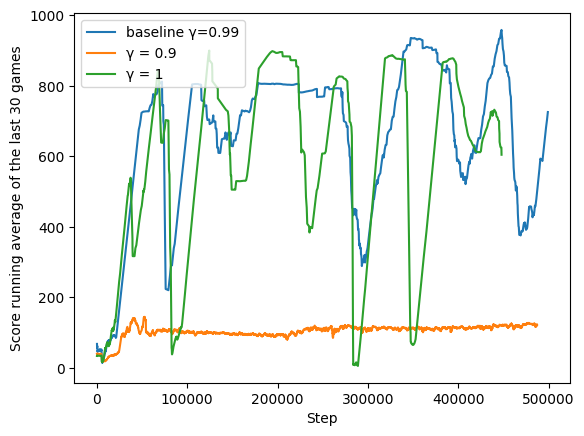

In [50]:
names = ['baseline', 'smaller_gamma', 'larger_gamma']
label_names = ['baseline γ=0.99', 'γ = 0.9', 'γ = 1']

plot_running_avg(data, names, label_names, n_game_avg=30)

## tau 

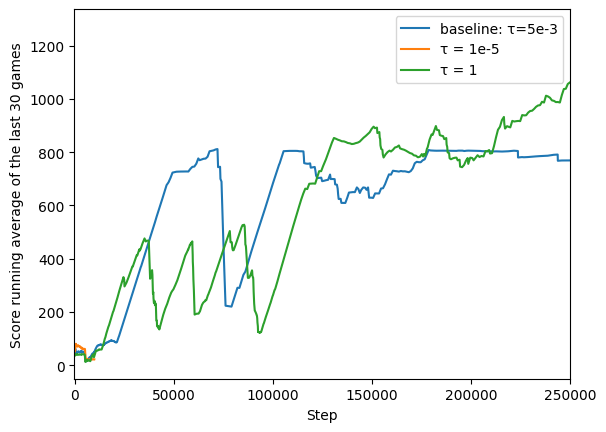

In [51]:
names = ['baseline', 'smaller_tau', 'larger_tau']
label_names = ['baseline: τ=5e-3', 'τ = 1e-5', 'τ = 1']

for name, label_name in zip(names, label_names):
        data[name]['running_avg'] = \
            np.array((pd.DataFrame(data[name]['score_history']).rolling(n_game_avg, min_periods=1).mean())[0])
        plt.plot(data[name]['step_history'], data[name]['running_avg'], label=label_name)

# Limit x axis t 250_000 steps
plt.xlim(left= -100, right=250_000)
plt.legend()
plt.xlabel('Step')
plt.ylabel(f'Score running average of the last {n_game_avg} games')
plt.show()

## smaller buffer

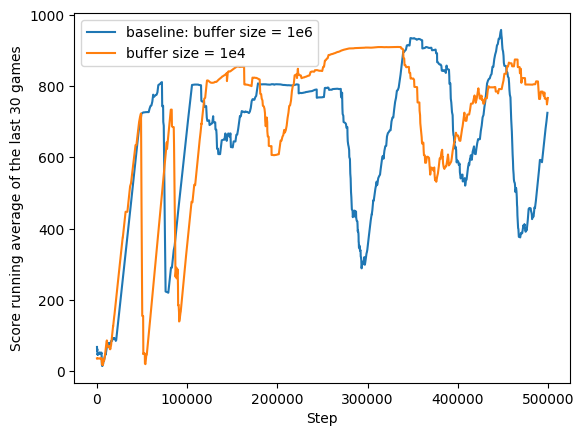

In [52]:
names = ['baseline', 'smaller_buffer']
label_names = ['baseline: buffer size = 1e6', 'buffer size = 1e4']

plot_running_avg(data, names, label_names, n_game_avg)

## Non Stochastic

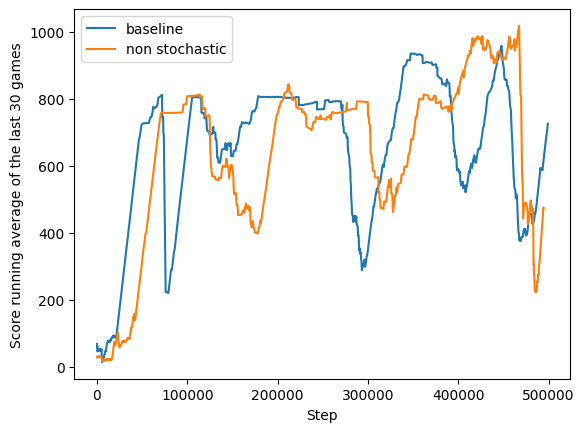

In [53]:
names = ['baseline', 'non_stochastic']
label_names = ['baseline', 'non stochastic']

plot_running_avg(data, names, label_names, n_game_avg)

## single critic

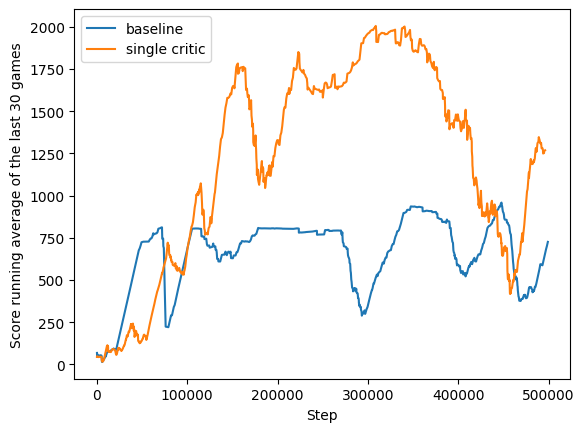

In [54]:
names = ['baseline', 'single_critic']
label_names = ['baseline', 'single critic']

plot_running_avg(data, names, label_names, n_game_avg)

## nn_dim